In [137]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import Normalize
import pandas as pd
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import metpy.calc as mpcalc
from metpy.units import units
from scipy.ndimage import binary_erosion, generic_filter
import matplotlib.cm as cm
from pandas import DataFrame, Index
import os
import cartopy.feature as cfeature
from scipy.ndimage import uniform_filter

In [138]:
#predictions NWP#
#initialized at 00
NWP_pred_00_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T00Z.nc')
NWP_pred_00_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T00Z.nc')
NWP_pred_00_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T00Z.nc')
NWP_pred_00_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T00Z.nc')
#initialized at 06#
NWP_pred_06_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T06Z.nc')
NWP_pred_06_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T06Z.nc')
NWP_pred_06_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T06Z.nc')
NWP_pred_06_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T06Z.nc')
#initialized at 12#
NWP_pred_12_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T12Z.nc')
NWP_pred_12_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T12Z.nc')
NWP_pred_12_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T12Z.nc')
NWP_pred_12_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T12Z.nc')
#initialized at 18#
NWP_pred_18_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T18Z.nc')
NWP_pred_18_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T18Z.nc')
NWP_pred_18_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T18Z.nc')
NWP_pred_18_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T18Z.nc')
#ground-truth DDM--> it is equal to prediction but we will select just the prediction step-0#
#time 00 
NWP_gt_00_0507 = NWP_pred_00_0507
#time 06
NWP_gt_06_0507 = NWP_pred_06_0507
#time 12
NWP_gt_12_0507 = NWP_pred_12_0507
#time 18
NWP_gt_18_0507 = NWP_pred_18_0507

In [139]:
data_dir_DDM = 'C:/Users/User/Documents/Master_Thesis/DATA/DDM_output'
nc_files = [f for f in os.listdir(data_dir_DDM) if f.endswith('.nc')]
nc_files.sort()

data_DDM = {}
for file_name in nc_files:
    file_path = os.path.join(data_dir_DDM, file_name)
    data_DDM[file_name] = xr.open_dataset(file_path)
    #print(f"Uploaded: {file_name}")

# Predictions DDM
# Initialized at 00
DDM_pred_00_0507 = data_DDM['20230705T00Z.nc']
DDM_pred_00_0407 = data_DDM['20230704T00Z.nc']
DDM_pred_00_0307 = data_DDM['20230703T00Z.nc']
DDM_pred_00_0207 = data_DDM['20230702T00Z.nc']
# Initialized at 06
DDM_pred_06_0507 = data_DDM['20230705T06Z.nc']
DDM_pred_06_0407 = data_DDM['20230704T06Z.nc']
DDM_pred_06_0307 = data_DDM['20230703T06Z.nc']
DDM_pred_06_0207 = data_DDM['20230702T06Z.nc']
# Initialized at 12
DDM_pred_12_0507 = data_DDM['20230705T12Z.nc']
DDM_pred_12_0407 = data_DDM['20230704T12Z.nc']
DDM_pred_12_0307 = data_DDM['20230703T12Z.nc']
DDM_pred_12_0207 = data_DDM['20230702T12Z.nc']
# Initialized at 18
DDM_pred_18_0507 = data_DDM['20230705T18Z.nc']
DDM_pred_18_0407 = data_DDM['20230704T18Z.nc']
DDM_pred_18_0307 = data_DDM['20230703T18Z.nc']
DDM_pred_18_0207 = data_DDM['20230702T18Z.nc']

# Ground-truth DDM
# Time 00 
DDM_gt_00_0507 = DDM_pred_00_0507
# Time 06
DDM_gt_06_0507 = DDM_pred_06_0507
# Time 12
DDM_gt_12_0507 = DDM_pred_12_0507
# Time 18
DDM_gt_18_0507 = DDM_pred_18_0507

In [140]:
def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    angles = np.zeros_like(u_DDM)
    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    return angles

def rotate_wind_3D(u, v, angle_rad):
    angle_rad_expanded = angle_rad[None, :, :]
    u_rot = u * np.cos(angle_rad_expanded) - v * np.sin(angle_rad_expanded)
    v_rot = u * np.sin(angle_rad_expanded) + v * np.cos(angle_rad_expanded)
    return u_rot, v_rot

'''
 x_wind_10m_lt6_NWP, y_wind_10m_lt6_NWP, mslp_lt6_NWP,
 x_wind_10m_lt30_NWP, y_wind_10m_lt30_NWP, mslp_lt30_NWP,
 x_wind_10m_lt54_NWP, y_wind_10m_lt54_NWP, mslp_lt54_NWP,
 x_wind_10m_analysis_NWP, y_wind_10m_analysis_NWP, mslp_analysis_NWP,
 x_wind_pl_lt6_NWP, y_wind_pl_lt6_NWP, Phi_pl_lt6_NWP,
 x_wind_pl_lt30_NWP, y_wind_pl_lt30_NWP, Phi_pl_lt30_NWP,
 x_wind_pl_lt54_NWP, y_wind_pl_lt54_NWP, Phi_pl_lt54_NWP,
 x_wind_pl_analysis_NWP, y_wind_pl_analysis_NWP, Phi_pl_analysis_NWP
'''

def prepare_datasets_NWP(lat, lon, pl_selected):

    latitude = NWP_pred_06_0507['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = NWP_pred_06_0507['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    
    #Analysis data
    x_wind_10m_analysis = NWP_pred_18_0507['x_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_analysis = NWP_pred_18_0507['y_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_analysis = NWP_pred_18_0507['air_pressure_at_sea_level'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    
    x_wind_pl_analysis = NWP_pred_18_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_analysis = NWP_pred_18_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_analysis = NWP_pred_18_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values
    
    #Predictions data lt = 6h
    x_wind_10m_lt6 = NWP_pred_12_0507['x_wind_10m'][6,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt6 = NWP_pred_12_0507['y_wind_10m'][6,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt6 = NWP_pred_12_0507['air_pressure_at_sea_level'][6,0,lat[0]:lat[1], lon[0]:lon[1]].values
    
    x_wind_pl_lt6 = NWP_pred_12_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[6,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt6 = NWP_pred_12_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[6,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt6 = NWP_pred_12_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[6,lat[0]:lat[1], lon[0]:lon[1]].values
    
    #Predictions data lt = 30h
    x_wind_10m_lt30 = NWP_pred_12_0407['x_wind_10m'][30,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt30 = NWP_pred_12_0407['y_wind_10m'][30,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt30 = NWP_pred_12_0407['air_pressure_at_sea_level'][30,0,lat[0]:lat[1], lon[0]:lon[1]].values
    
    x_wind_pl_lt30 = NWP_pred_12_0407['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[30,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt30 = NWP_pred_12_0407['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[30,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt30 = NWP_pred_12_0407['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[30,lat[0]:lat[1], lon[0]:lon[1]].values

    #Predictions data lt = 54h
    x_wind_10m_lt54 = NWP_pred_12_0307['x_wind_10m'][54,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt54 = NWP_pred_12_0307['y_wind_10m'][54,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt54 = NWP_pred_12_0307['air_pressure_at_sea_level'][54,0,lat[0]:lat[1], lon[0]:lon[1]].values
    
    x_wind_pl_lt54 = NWP_pred_12_0307['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[54,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt54 = NWP_pred_12_0307['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[54,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt54 = NWP_pred_12_0307['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[54,lat[0]:lat[1], lon[0]:lon[1]].values
    
    return (
           latitude, longitude, 
           x_wind_10m_lt6, y_wind_10m_lt6, mslp_lt6,
           x_wind_10m_lt30, y_wind_10m_lt30, mslp_lt30,
           x_wind_10m_lt54, y_wind_10m_lt54, mslp_lt54,
           x_wind_10m_analysis, y_wind_10m_analysis, mslp_analysis,
           
           x_wind_pl_lt6, y_wind_pl_lt6, Phi_pl_lt6,
           x_wind_pl_lt30, y_wind_pl_lt30, Phi_pl_lt30,
           x_wind_pl_lt54, y_wind_pl_lt54, Phi_pl_lt54,
           x_wind_pl_analysis, y_wind_pl_analysis, Phi_pl_analysis
    )

def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    angles = np.zeros_like(u_DDM)
    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    return angles

def rotate_wind_3D(u, v, angle_rad):
    u_rot = u * np.cos(angle_rad) - v * np.sin(angle_rad)
    v_rot = u * np.sin(angle_rad) + v * np.cos(angle_rad)
    return u_rot, v_rot

def prepare_datasets_DDM(lat, lon, angles, pl_selected):

    latitude = NWP_pred_18_0507['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    longitude = NWP_pred_18_0507['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values   
    
    #Analysis data
    x_wind_10m_analysis = DDM_pred_18_0507['x_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_analysis = DDM_pred_18_0507['y_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_analysis = DDM_pred_18_0507['air_pressure_at_sea_level'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values

    x_wind_pl_analysis = DDM_pred_18_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_analysis = DDM_pred_18_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_analysis = DDM_pred_18_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values
    
    x_wind_10m_analysis, y_wind_10m_analysis = rotate_wind_3D(x_wind_10m_analysis, y_wind_10m_analysis,angles) 
    x_wind_pl_analysis, y_wind_pl_analysis = rotate_wind_3D(x_wind_pl_analysis,y_wind_pl_analysis,angles)
    
    #Predictions data lt = 6h
    x_wind_10m_lt6 = DDM_pred_12_0507['x_wind_10m'][1,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt6 = DDM_pred_12_0507['y_wind_10m'][1,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt6 = DDM_pred_12_0507['air_pressure_at_sea_level'][1,0,lat[0]:lat[1], lon[0]:lon[1]].values

    x_wind_pl_lt6 = DDM_pred_12_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[1,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt6 = DDM_pred_12_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[1,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt6 = DDM_pred_12_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[1,lat[0]:lat[1], lon[0]:lon[1]].values
    
    x_wind_10m_lt6, y_wind_10m_lt6 = rotate_wind_3D(x_wind_10m_lt6,y_wind_10m_lt6,angles) 
    x_wind_pl_lt6, y_wind_pl_lt6 = rotate_wind_3D(x_wind_pl_lt6,y_wind_pl_lt6,angles) 
    
    #Predictions data lt = 30h
    x_wind_10m_lt30 = DDM_pred_12_0407['x_wind_10m'][5,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt30 = DDM_pred_12_0407['y_wind_10m'][5,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt30 = DDM_pred_12_0407['air_pressure_at_sea_level'][5,0,lat[0]:lat[1], lon[0]:lon[1]].values

    x_wind_pl_lt30 = DDM_pred_12_0407['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[5,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt30 = DDM_pred_12_0407['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[5,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt30 = DDM_pred_12_0407['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[5,lat[0]:lat[1], lon[0]:lon[1]].values
    
    x_wind_10m_lt30, y_wind_10m_lt30 = rotate_wind_3D(x_wind_10m_lt30, y_wind_10m_lt30,angles) 
    x_wind_pl_lt30, y_wind_pl_lt30 = rotate_wind_3D(x_wind_pl_lt30,y_wind_pl_lt30,angles) 
    
    #Predictions data lt = 54h
    x_wind_10m_lt54 = DDM_pred_12_0307['x_wind_10m'][9,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt54 = DDM_pred_12_0307['y_wind_10m'][9,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt54 = DDM_pred_12_0307['air_pressure_at_sea_level'][9,0,lat[0]:lat[1], lon[0]:lon[1]].values

    x_wind_pl_lt54 = DDM_pred_12_0307['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[9,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt54 = DDM_pred_12_0307['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[9,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt54 = DDM_pred_12_0307['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[9,lat[0]:lat[1], lon[0]:lon[1]].values    
    
    x_wind_10m_lt54, y_wind_10m_lt54 = rotate_wind_3D(x_wind_10m_lt54, y_wind_10m_lt54,angles) 
    x_wind_pl_lt54, y_wind_pl_lt54 = rotate_wind_3D(x_wind_pl_lt54,y_wind_pl_lt54,angles)
    
    return (
           latitude, longitude, 
           x_wind_10m_lt6, y_wind_10m_lt6, mslp_lt6,
           x_wind_10m_lt30, y_wind_10m_lt30, mslp_lt30,
           x_wind_10m_lt54, y_wind_10m_lt54, mslp_lt54,
           x_wind_10m_analysis, y_wind_10m_analysis, mslp_analysis,
        
           x_wind_pl_lt6, y_wind_pl_lt6, Phi_pl_lt6,
           x_wind_pl_lt30, y_wind_pl_lt30, Phi_pl_lt30,
           x_wind_pl_lt54, y_wind_pl_lt54, Phi_pl_lt54,
           x_wind_pl_analysis, y_wind_pl_analysis, Phi_pl_analysis
    )

def compute_spectrum(field, dim_x, dim_y, res):
    """Compute the 2D FFT and spectral power of a field."""
    # Convert to NumPy array if it's a DataArray
    if hasattr(field, 'values'):
        field = field.values
    elif hasattr(field, 'to_numpy'):
        field = field.to_numpy()
        
    #if field.ndim == 3:
        #field = field[0]
    #if field.ndim == 1:
        #field = field.reshape(dim_x, dim_y)
        
    field = np.rot90(field)
    field = (field - np.mean(field))
    spectra = np.fft.rfft2(field)
    spectra_nn = np.sum(np.abs(spectra)/(dim_x * dim_y), axis=0)   
    wavelengths = 2 * res * spectra_nn.shape[0] / np.arange(1, spectra_nn.shape[0])
    
    return wavelengths, spectra_nn[1:]

def plot_1d_power_spectrum_comparison(wavelength_list, power_1d_list, labels, colors=None, 
                                     figsize=(4, 5), title=''):
    
    plt.figure(figsize=figsize)
    
    if colors is None:
        colors = [
            '#a6cee3', '#1f78b4', '#08306b', 
            '#b2df8a', '#33a02c', '#006400',   
            'orange',
        ]

    for i, (wavelength, power_1d) in enumerate(zip(wavelength_list, power_1d_list)):
        color = colors[i % len(colors)]
        plt.loglog(wavelength, power_1d, 'o-', linewidth=1, markersize=2, 
                  color=color, label=labels[i])
    
    plt.xlabel('Wavelength (km)')
    plt.ylabel('Power Spectral Density')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Set ticks
    all_wavelengths = np.concatenate(wavelength_list)
    min_wavelength = np.min(all_wavelengths)
    max_wavelength = np.max(all_wavelengths)
    
    decades = np.arange(np.floor(np.log10(min_wavelength)), np.ceil(np.log10(max_wavelength)) + 1)
    major_ticks = []
    
    for decade in decades:
        major_ticks.extend([1 * 10**decade, 2 * 10**decade, 5 * 10**decade])
    
    major_ticks = [tick for tick in major_ticks if min_wavelength <= tick <= max_wavelength]
    
    plt.xticks(major_ticks)
    plt.gca().set_xticklabels([f'{tick:.0f}' if tick >= 1 else f'{tick:.1f}' for tick in major_ticks])
    
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.show()
    

In [141]:
LAT_NWP = [1,451]  #LAT_NWP = [1,1067]
LON_NWP = [1,451]   #LON_NWP = [1,947]

LAT_DDM = [0,450]  #LAT_DDM = [0,1066]
LON_DDM = [0,450]   #LON_DDM = [0,946]

pl_selected = 500

u_DDM_gt_00_0507 = DDM_gt_00_0507['x_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LON_DDM[1]]
u_DDM_gt_00_0507 = np.array(u_DDM_gt_00_0507)

u_NWP_gt_00_0507 = NWP_gt_00_0507['x_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
u_NWP_gt_00_0507 = np.array(u_NWP_gt_00_0507)

v_DDM_gt_00_0507 = DDM_gt_00_0507['y_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LAT_DDM[1]]
v_DDM_gt_00_0507 = np.array(v_DDM_gt_00_0507)

v_NWP_gt_00_0507 = NWP_gt_00_0507['y_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
v_NWP_gt_00_0507 = np.array(v_NWP_gt_00_0507)

angles = calculate_rotation_angles(u_DDM_gt_00_0507, v_DDM_gt_00_0507, u_NWP_gt_00_0507, v_NWP_gt_00_0507)

(latitude_NWP, longitude_NWP,
 x_wind_10m_lt6_NWP, y_wind_10m_lt6_NWP, mslp_lt6_NWP,
 x_wind_10m_lt30_NWP, y_wind_10m_lt30_NWP, mslp_lt30_NWP,
 x_wind_10m_lt54_NWP, y_wind_10m_lt54_NWP, mslp_lt54_NWP,
 x_wind_10m_analysis_NWP, y_wind_10m_analysis_NWP, mslp_analysis_NWP,
 x_wind_pl_lt6_NWP, y_wind_pl_lt6_NWP, Phi_pl_lt6_NWP,
 x_wind_pl_lt30_NWP, y_wind_pl_lt30_NWP, Phi_pl_lt30_NWP,
 x_wind_pl_lt54_NWP, y_wind_pl_lt54_NWP, Phi_pl_lt54_NWP,
 x_wind_pl_analysis_NWP, y_wind_pl_analysis_NWP, Phi_pl_analysis_NWP
) = prepare_datasets_NWP(
        LAT_NWP,
        LON_NWP,
        pl_selected = pl_selected
    )

(latitude_DDM, longitude_DDM,
 x_wind_10m_lt6_DDM, y_wind_10m_lt6_DDM, mslp_lt6_DDM,
 x_wind_10m_lt30_DDM, y_wind_10m_lt30_DDM, mslp_lt30_DDM,
 x_wind_10m_lt54_DDM, y_wind_10m_lt54_DDM, mslp_lt54_DDM,
 x_wind_10m_analysis_DDM, y_wind_10m_analysis_DDM, mslp_analysis_DDM,
 x_wind_pl_lt6_DDM, y_wind_pl_lt6_DDM, Phi_pl_lt6_DDM,
 x_wind_pl_lt30_DDM, y_wind_pl_lt30_DDM, Phi_pl_lt30_DDM,
 x_wind_pl_lt54_DDM, y_wind_pl_lt54_DDM, Phi_pl_lt54_DDM,
 x_wind_pl_analysis_DDM, y_wind_pl_analysis_DDM, Phi_pl_analysis_DDM
) = prepare_datasets_DDM(
        LAT_DDM,
        LON_DDM,
        angles,
        pl_selected = pl_selected
    )

In [142]:
#u10m
wl_u10m_NWP_lt6, psd_u10m_NWP_lt6 = compute_spectrum(x_wind_10m_lt6_NWP, x_wind_10m_lt6_NWP.shape[1], x_wind_10m_lt6_NWP.shape[0], 2.5)
wl_u10m_DDM_lt6, psd_u10m_DDM_lt6 = compute_spectrum(x_wind_10m_lt6_DDM, x_wind_10m_lt6_DDM.shape[1], x_wind_10m_lt6_DDM.shape[0], 2.5)
wl_u10m_NWP_lt30, psd_u10m_NWP_lt30 = compute_spectrum(x_wind_10m_lt30_NWP, x_wind_10m_lt30_NWP.shape[1], x_wind_10m_lt30_NWP.shape[0], 2.5)
wl_u10m_DDM_lt30, psd_u10m_DDM_lt30 = compute_spectrum(x_wind_10m_lt30_DDM, x_wind_10m_lt30_DDM.shape[1], x_wind_10m_lt30_DDM.shape[0], 2.5)
wl_u10m_NWP_lt54, psd_u10m_NWP_lt54 = compute_spectrum(x_wind_10m_lt54_NWP, x_wind_10m_lt54_NWP.shape[1], x_wind_10m_lt54_NWP.shape[0], 2.5)
wl_u10m_DDM_lt54, psd_u10m_DDM_lt54 = compute_spectrum(x_wind_10m_lt54_DDM, x_wind_10m_lt54_DDM.shape[1], x_wind_10m_lt54_DDM.shape[0], 2.5)
wl_u10m_Analysis, psd_u10m_Analysis = compute_spectrum(x_wind_10m_analysis_NWP, x_wind_10m_analysis_NWP.shape[1], x_wind_10m_analysis_NWP.shape[0], 2.5)

#u_pl
wl_u_pl_NWP_lt6, psd_u_pl_NWP_lt6 = compute_spectrum(x_wind_pl_lt6_NWP, x_wind_pl_lt6_NWP.shape[1], x_wind_pl_lt6_NWP.shape[0], 2.5)
wl_u_pl_DDM_lt6, psd_u_pl_DDM_lt6 = compute_spectrum(x_wind_pl_lt6_DDM, x_wind_pl_lt6_DDM.shape[1], x_wind_pl_lt6_DDM.shape[0], 2.5)
wl_u_pl_NWP_lt30, psd_u_pl_NWP_lt30 = compute_spectrum(x_wind_pl_lt30_NWP, x_wind_pl_lt30_NWP.shape[1], x_wind_pl_lt30_NWP.shape[0], 2.5)
wl_u_pl_DDM_lt30, psd_u_pl_DDM_lt30 = compute_spectrum(x_wind_pl_lt30_DDM, x_wind_pl_lt30_DDM.shape[1], x_wind_pl_lt30_DDM.shape[0], 2.5)
wl_u_pl_NWP_lt54, psd_u_pl_NWP_lt54 = compute_spectrum(x_wind_pl_lt54_NWP, x_wind_pl_lt54_NWP.shape[1], x_wind_pl_lt54_NWP.shape[0], 2.5)
wl_u_pl_DDM_lt54, psd_u_pl_DDM_lt54 = compute_spectrum(x_wind_pl_lt54_DDM, x_wind_pl_lt54_DDM.shape[1], x_wind_pl_lt54_DDM.shape[0], 2.5)
wl_u_pl_Analysis, psd_u_pl_Analysis = compute_spectrum(x_wind_pl_analysis_NWP, x_wind_pl_analysis_NWP.shape[1], x_wind_pl_analysis_NWP.shape[0], 2.5)

In [143]:
#v10m
wl_v10m_NWP_lt6, psd_v10m_NWP_lt6 = compute_spectrum(y_wind_10m_lt6_NWP, y_wind_10m_lt6_NWP.shape[1], y_wind_10m_lt6_NWP.shape[0], 2.5)
wl_v10m_DDM_lt6, psd_v10m_DDM_lt6 = compute_spectrum(y_wind_10m_lt6_DDM, y_wind_10m_lt6_DDM.shape[1], y_wind_10m_lt6_DDM.shape[0], 2.5)
wl_v10m_NWP_lt30, psd_v10m_NWP_lt30 = compute_spectrum(y_wind_10m_lt30_NWP, y_wind_10m_lt30_NWP.shape[1], y_wind_10m_lt30_NWP.shape[0], 2.5)
wl_v10m_DDM_lt30, psd_v10m_DDM_lt30 = compute_spectrum(y_wind_10m_lt30_DDM, y_wind_10m_lt30_DDM.shape[1], y_wind_10m_lt30_DDM.shape[0], 2.5)
wl_v10m_NWP_lt54, psd_v10m_NWP_lt54 = compute_spectrum(y_wind_10m_lt54_NWP, y_wind_10m_lt54_NWP.shape[1], y_wind_10m_lt54_NWP.shape[0], 2.5)
wl_v10m_DDM_lt54, psd_v10m_DDM_lt54 = compute_spectrum(y_wind_10m_lt54_DDM, y_wind_10m_lt54_DDM.shape[1], y_wind_10m_lt54_DDM.shape[0], 2.5)
wl_v10m_Analysis, psd_v10m_Analysis = compute_spectrum(y_wind_10m_analysis_NWP, y_wind_10m_analysis_NWP.shape[1], y_wind_10m_analysis_NWP.shape[0], 2.5)

#v_pl
wl_v_pl_NWP_lt6, psd_v_pl_NWP_lt6 = compute_spectrum(y_wind_pl_lt6_NWP, y_wind_pl_lt6_NWP.shape[1], y_wind_pl_lt6_NWP.shape[0], 2.5)
wl_v_pl_DDM_lt6, psd_v_pl_DDM_lt6 = compute_spectrum(y_wind_pl_lt6_DDM, y_wind_pl_lt6_DDM.shape[1], y_wind_pl_lt6_DDM.shape[0], 2.5)
wl_v_pl_NWP_lt30, psd_v_pl_NWP_lt30 = compute_spectrum(y_wind_pl_lt30_NWP, y_wind_pl_lt30_NWP.shape[1], y_wind_pl_lt30_NWP.shape[0], 2.5)
wl_v_pl_DDM_lt30, psd_v_pl_DDM_lt30 = compute_spectrum(y_wind_pl_lt30_DDM, y_wind_pl_lt30_DDM.shape[1], y_wind_pl_lt30_DDM.shape[0], 2.5)
wl_v_pl_NWP_lt54, psd_v_pl_NWP_lt54 = compute_spectrum(y_wind_pl_lt54_NWP, y_wind_pl_lt54_NWP.shape[1], y_wind_pl_lt54_NWP.shape[0], 2.5)
wl_v_pl_DDM_lt54, psd_v_pl_DDM_lt54 = compute_spectrum(y_wind_pl_lt54_DDM, y_wind_pl_lt54_DDM.shape[1], y_wind_pl_lt54_DDM.shape[0], 2.5)
wl_v_pl_Analysis, psd_v_pl_Analysis = compute_spectrum(y_wind_pl_analysis_NWP, y_wind_pl_analysis_NWP.shape[1], y_wind_pl_analysis_NWP.shape[0], 2.5)

In [144]:
#mslp
wl_mslp_NWP_lt6, psd_mslp_NWP_lt6 = compute_spectrum(mslp_lt6_NWP, mslp_lt6_NWP.shape[1], mslp_lt6_NWP.shape[0], 2.5)
wl_mslp_DDM_lt6, psd_mslp_DDM_lt6 = compute_spectrum(mslp_lt6_DDM, mslp_lt6_DDM.shape[1], mslp_lt6_DDM.shape[0], 2.5)
wl_mslp_NWP_lt30, psd_mslp_NWP_lt30 = compute_spectrum(mslp_lt30_NWP, mslp_lt30_NWP.shape[1], mslp_lt30_NWP.shape[0], 2.5)
wl_mslp_DDM_lt30, psd_mslp_DDM_lt30 = compute_spectrum(mslp_lt30_DDM, mslp_lt30_DDM.shape[1], mslp_lt30_DDM.shape[0], 2.5)
wl_mslp_NWP_lt54, psd_mslp_NWP_lt54 = compute_spectrum(mslp_lt54_NWP, mslp_lt54_NWP.shape[1], mslp_lt54_NWP.shape[0], 2.5)
wl_mslp_DDM_lt54, psd_mslp_DDM_lt54 = compute_spectrum(mslp_lt54_DDM, mslp_lt54_DDM.shape[1], mslp_lt54_DDM.shape[0], 2.5)
wl_mslp_Analysis, psd_mslp_Analysis = compute_spectrum(mslp_analysis_NWP, mslp_analysis_NWP.shape[1], mslp_analysis_NWP.shape[0], 2.5)

#Phi_pl
wl_Phi_pl_NWP_lt6, psd_Phi_pl_NWP_lt6 = compute_spectrum(Phi_pl_lt6_NWP, Phi_pl_lt6_NWP.shape[1], Phi_pl_lt6_NWP.shape[0], 2.5)
wl_Phi_pl_DDM_lt6, psd_Phi_pl_DDM_lt6 = compute_spectrum(Phi_pl_lt6_DDM, Phi_pl_lt6_DDM.shape[1], Phi_pl_lt6_DDM.shape[0], 2.5)
wl_Phi_pl_NWP_lt30, psd_Phi_pl_NWP_lt30 = compute_spectrum(Phi_pl_lt30_NWP, Phi_pl_lt30_NWP.shape[1], Phi_pl_lt30_NWP.shape[0], 2.5)
wl_Phi_pl_DDM_lt30, psd_Phi_pl_DDM_lt30 = compute_spectrum(Phi_pl_lt30_DDM, Phi_pl_lt30_DDM.shape[1], Phi_pl_lt30_DDM.shape[0], 2.5)
wl_Phi_pl_NWP_lt54, psd_Phi_pl_NWP_lt54 = compute_spectrum(Phi_pl_lt54_NWP, Phi_pl_lt54_NWP.shape[1], Phi_pl_lt54_NWP.shape[0], 2.5)
wl_Phi_pl_DDM_lt54, psd_Phi_pl_DDM_lt54 = compute_spectrum(Phi_pl_lt54_DDM, Phi_pl_lt54_DDM.shape[1], Phi_pl_lt54_DDM.shape[0], 2.5)
wl_Phi_pl_Analysis, psd_Phi_pl_Analysis = compute_spectrum(Phi_pl_analysis_NWP, Phi_pl_analysis_NWP.shape[1], Phi_pl_analysis_NWP.shape[0], 2.5)

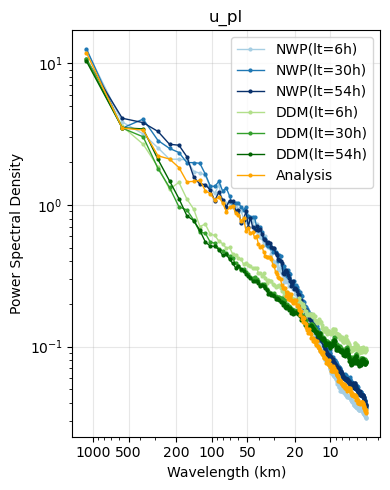

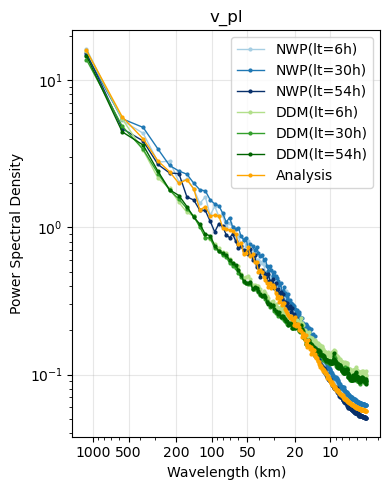

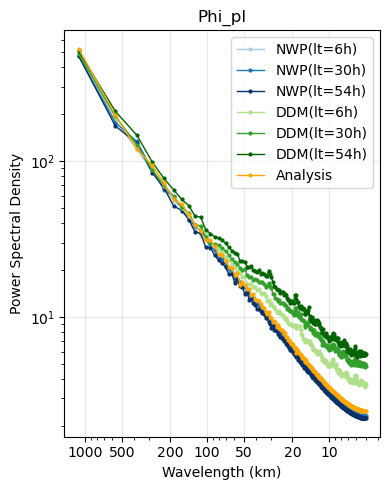

In [145]:
#u_pl
wl_u_pl_list = [wl_u_pl_NWP_lt6, wl_u_pl_NWP_lt30, wl_u_pl_NWP_lt54,
                   wl_u_pl_DDM_lt6, wl_u_pl_DDM_lt30, wl_u_pl_DDM_lt54,
                   wl_u_pl_Analysis]

pwd_u_pl_list = [psd_u_pl_NWP_lt6, psd_u_pl_NWP_lt30, psd_u_pl_NWP_lt54,
                   psd_u_pl_DDM_lt6, psd_u_pl_DDM_lt30, psd_u_pl_DDM_lt54,
                   psd_u_pl_Analysis]

labels = ['NWP(lt=6h)','NWP(lt=30h)','NWP(lt=54h)','DDM(lt=6h)','DDM(lt=30h)','DDM(lt=54h)','Analysis']

plot_1d_power_spectrum_comparison(wl_u_pl_list, pwd_u_pl_list, labels, title='u_pl')

#v_pl
wl_v_pl_list = [wl_v_pl_NWP_lt6, wl_v_pl_NWP_lt30, wl_v_pl_NWP_lt54,
                   wl_v_pl_DDM_lt6, wl_v_pl_DDM_lt30, wl_v_pl_DDM_lt54,
                   wl_v_pl_Analysis]

pwd_v_pl_list = [psd_v_pl_NWP_lt6, psd_v_pl_NWP_lt30, psd_v_pl_NWP_lt54,
                   psd_v_pl_DDM_lt6, psd_v_pl_DDM_lt30, psd_v_pl_DDM_lt54,
                   psd_v_pl_Analysis]

labels = ['NWP(lt=6h)','NWP(lt=30h)','NWP(lt=54h)','DDM(lt=6h)','DDM(lt=30h)','DDM(lt=54h)','Analysis']

plot_1d_power_spectrum_comparison(wl_v_pl_list, pwd_v_pl_list, labels, title='v_pl')

#Phi_pl
wl_Phi_pl_list = [wl_Phi_pl_NWP_lt6, wl_Phi_pl_NWP_lt30, wl_Phi_pl_NWP_lt54,
                    wl_Phi_pl_DDM_lt6, wl_Phi_pl_DDM_lt30, wl_Phi_pl_DDM_lt54,
                    wl_Phi_pl_Analysis]

pwd_Phi_pl_list = [psd_Phi_pl_NWP_lt6, psd_Phi_pl_NWP_lt30, psd_Phi_pl_NWP_lt54,
                     psd_Phi_pl_DDM_lt6, psd_Phi_pl_DDM_lt30, psd_Phi_pl_DDM_lt54,
                     psd_Phi_pl_Analysis]

labels = ['NWP(lt=6h)','NWP(lt=30h)','NWP(lt=54h)','DDM(lt=6h)','DDM(lt=30h)','DDM(lt=54h)','Analysis']

plot_1d_power_spectrum_comparison(wl_Phi_pl_list, pwd_Phi_pl_list, labels, title='Phi_pl')

In [146]:
def block_average(data, factor_smoothing):
    kernel_size = 2 * factor_smoothing + 1
    smoothed_data = uniform_filter(data, size=kernel_size, mode='nearest')
    return smoothed_data

def prepare_datasets_NWP_with_smoothing(factor_smoothing, lat, lon, pl_selected):

    latitude = NWP_pred_18_0507['latitude'][lat[0]:lat[1], lon[0]:lon[1]].values
    longitude = NWP_pred_18_0507['longitude'][lat[0]:lat[1], lon[0]:lon[1]].values

    # Analysis data
    x_wind_10m_analysis = block_average(NWP_pred_18_0507['x_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    y_wind_10m_analysis = block_average(NWP_pred_18_0507['y_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    mslp_analysis = block_average(NWP_pred_18_0507['air_pressure_at_sea_level'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_pl_analysis = block_average(NWP_pred_18_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    y_wind_pl_analysis = block_average(NWP_pred_18_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    Phi_pl_analysis = block_average(NWP_pred_18_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    # Analysis data
    #x_wind_10m_analysis = NWP_pred_18_0507['x_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    #y_wind_10m_analysis = NWP_pred_18_0507['y_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    #mslp_analysis = NWP_pred_18_0507['air_pressure_at_sea_level'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values

    #x_wind_pl_analysis = NWP_pred_18_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values
    #y_wind_pl_analysis = NWP_pred_18_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values
    #Phi_pl_analysis = NWP_pred_18_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values   
    
    # Predictions data lt = 6h
    x_wind_10m_lt6 = block_average(NWP_pred_12_0507['x_wind_10m'][6,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    y_wind_10m_lt6 = block_average(NWP_pred_12_0507['y_wind_10m'][6,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    mslp_lt6 = block_average(NWP_pred_12_0507['air_pressure_at_sea_level'][6,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_pl_lt6 = block_average(NWP_pred_12_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[6,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    y_wind_pl_lt6 = block_average(NWP_pred_12_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[6,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    Phi_pl_lt6 = block_average(NWP_pred_12_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[6,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    # Predictions data lt = 30h
    x_wind_10m_lt30 = block_average(NWP_pred_12_0407['x_wind_10m'][30,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    y_wind_10m_lt30 = block_average(NWP_pred_12_0407['y_wind_10m'][30,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    mslp_lt30 = block_average(NWP_pred_12_0407['air_pressure_at_sea_level'][30,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_pl_lt30 = block_average(NWP_pred_12_0407['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[30,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    y_wind_pl_lt30 = block_average(NWP_pred_12_0407['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[30,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    Phi_pl_lt30 = block_average(NWP_pred_12_0407['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[30,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    # Predictions data lt = 54h
    x_wind_10m_lt54 = block_average(NWP_pred_12_0307['x_wind_10m'][54,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    y_wind_10m_lt54 = block_average(NWP_pred_12_0307['y_wind_10m'][54,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    mslp_lt54 = block_average(NWP_pred_12_0307['air_pressure_at_sea_level'][54,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_pl_lt54 = block_average(NWP_pred_12_0307['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[54,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    y_wind_pl_lt54 = block_average(NWP_pred_12_0307['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[54,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)
    Phi_pl_lt54 = block_average(NWP_pred_12_0307['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[54,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    return (
        latitude, longitude, 

        x_wind_10m_analysis, y_wind_10m_analysis, mslp_analysis,
        x_wind_10m_lt6, y_wind_10m_lt6, mslp_lt6,
        x_wind_10m_lt30, y_wind_10m_lt30, mslp_lt30,
        x_wind_10m_lt54, y_wind_10m_lt54, mslp_lt54,

        x_wind_pl_analysis, y_wind_pl_analysis, Phi_pl_analysis,
        x_wind_pl_lt6, y_wind_pl_lt6, Phi_pl_lt6,
        x_wind_pl_lt30, y_wind_pl_lt30, Phi_pl_lt30,
        x_wind_pl_lt54, y_wind_pl_lt54, Phi_pl_lt54
    )

def prepare_datasets_DDM_with_smoothing(factor_smoothing, lat, lon, angles, pl_selected):

    latitude = DDM_pred_18_0507['latitude'][lat[0]:lat[1], lon[0]:lon[1]].values
    longitude = DDM_pred_18_0507['longitude'][lat[0]:lat[1], lon[0]:lon[1]].values     

    # --- Analysis data ---
    x_wind_10m_analysis = DDM_pred_18_0507['x_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_analysis = DDM_pred_18_0507['y_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_analysis = block_average(DDM_pred_18_0507['air_pressure_at_sea_level'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_pl_analysis = DDM_pred_18_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_analysis = DDM_pred_18_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_analysis = block_average(DDM_pred_18_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    # Rotate then block-average winds
    x_wind_10m_analysis, y_wind_10m_analysis = rotate_wind_3D(x_wind_10m_analysis, y_wind_10m_analysis, angles)
    x_wind_10m_analysis = block_average(x_wind_10m_analysis, factor_smoothing)
    y_wind_10m_analysis = block_average(y_wind_10m_analysis, factor_smoothing)

    x_wind_pl_analysis, y_wind_pl_analysis = rotate_wind_3D(x_wind_pl_analysis, y_wind_pl_analysis, angles)
    x_wind_pl_analysis = block_average(x_wind_pl_analysis, factor_smoothing)
    y_wind_pl_analysis = block_average(y_wind_pl_analysis, factor_smoothing)
    
    # --- Analysis data ---
    #x_wind_10m_analysis = DDM_pred_18_0507['x_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    #y_wind_10m_analysis = DDM_pred_18_0507['y_wind_10m'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values
    #mslp_analysis = DDM_pred_18_0507['air_pressure_at_sea_level'][0,0,lat[0]:lat[1], lon[0]:lon[1]].values

    #x_wind_pl_analysis = DDM_pred_18_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values
    #y_wind_pl_analysis = DDM_pred_18_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values    
    #Phi_pl_analysis = DDM_pred_18_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0,lat[0]:lat[1], lon[0]:lon[1]].values

    # Rotate then block-average winds
    #x_wind_10m_analysis, y_wind_10m_analysis = rotate_wind_3D(x_wind_10m_analysis, y_wind_10m_analysis, angles)
    #x_wind_pl_analysis, y_wind_pl_analysis = rotate_wind_3D(x_wind_pl_analysis, y_wind_pl_analysis, angles)
    
    # --- Lead time 6h ---
    x_wind_10m_lt6 = DDM_pred_12_0507['x_wind_10m'][1,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt6 = DDM_pred_12_0507['y_wind_10m'][1,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt6 = block_average(DDM_pred_12_0507['air_pressure_at_sea_level'][1,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_pl_lt6 = DDM_pred_12_0507['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[1,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt6 = DDM_pred_12_0507['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[1,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt6 = block_average(DDM_pred_12_0507['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[1,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_10m_lt6, y_wind_10m_lt6 = rotate_wind_3D(x_wind_10m_lt6, y_wind_10m_lt6, angles)
    x_wind_10m_lt6 = block_average(x_wind_10m_lt6, factor_smoothing)
    y_wind_10m_lt6 = block_average(y_wind_10m_lt6, factor_smoothing)

    x_wind_pl_lt6, y_wind_pl_lt6 = rotate_wind_3D(x_wind_pl_lt6, y_wind_pl_lt6, angles)
    x_wind_pl_lt6 = block_average(x_wind_pl_lt6, factor_smoothing)
    y_wind_pl_lt6 = block_average(y_wind_pl_lt6, factor_smoothing)

    # --- Lead time 30h ---
    x_wind_10m_lt30 = DDM_pred_12_0407['x_wind_10m'][5,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt30 = DDM_pred_12_0407['y_wind_10m'][5,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt30 = block_average(DDM_pred_12_0407['air_pressure_at_sea_level'][5,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_pl_lt30 = DDM_pred_12_0407['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[5,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt30 = DDM_pred_12_0407['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[5,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt30 = block_average(DDM_pred_12_0407['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[5,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_10m_lt30, y_wind_10m_lt30 = rotate_wind_3D(x_wind_10m_lt30, y_wind_10m_lt30, angles)
    x_wind_10m_lt30 = block_average(x_wind_10m_lt30, factor_smoothing)
    y_wind_10m_lt30 = block_average(y_wind_10m_lt30, factor_smoothing)

    x_wind_pl_lt30, y_wind_pl_lt30 = rotate_wind_3D(x_wind_pl_lt30, y_wind_pl_lt30, angles)
    x_wind_pl_lt30 = block_average(x_wind_pl_lt30, factor_smoothing)
    y_wind_pl_lt30 = block_average(y_wind_pl_lt30, factor_smoothing)

    # --- Lead time 54h ---
    x_wind_10m_lt54 = DDM_pred_12_0307['x_wind_10m'][9,0,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_10m_lt54 = DDM_pred_12_0307['y_wind_10m'][9,0,lat[0]:lat[1], lon[0]:lon[1]].values
    mslp_lt54 = block_average(DDM_pred_12_0307['air_pressure_at_sea_level'][9,0,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_pl_lt54 = DDM_pred_12_0307['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[9,lat[0]:lat[1], lon[0]:lon[1]].values
    y_wind_pl_lt54 = DDM_pred_12_0307['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[9,lat[0]:lat[1], lon[0]:lon[1]].values    
    Phi_pl_lt54 = block_average(DDM_pred_12_0307['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[9,lat[0]:lat[1], lon[0]:lon[1]].values, factor_smoothing)

    x_wind_10m_lt54, y_wind_10m_lt54 = rotate_wind_3D(x_wind_10m_lt54, y_wind_10m_lt54, angles)
    x_wind_10m_lt54 = block_average(x_wind_10m_lt54, factor_smoothing)
    y_wind_10m_lt54 = block_average(y_wind_10m_lt54, factor_smoothing)

    x_wind_pl_lt54, y_wind_pl_lt54 = rotate_wind_3D(x_wind_pl_lt54, y_wind_pl_lt54, angles)
    x_wind_pl_lt54 = block_average(x_wind_pl_lt54, factor_smoothing)
    y_wind_pl_lt54 = block_average(y_wind_pl_lt54, factor_smoothing)

    return (
        latitude, longitude,

        x_wind_10m_analysis, y_wind_10m_analysis, mslp_analysis,
        x_wind_10m_lt6, y_wind_10m_lt6, mslp_lt6,
        x_wind_10m_lt30, y_wind_10m_lt30, mslp_lt30,
        x_wind_10m_lt54, y_wind_10m_lt54, mslp_lt54,

        x_wind_pl_analysis, y_wind_pl_analysis, Phi_pl_analysis,
        x_wind_pl_lt6, y_wind_pl_lt6, Phi_pl_lt6,
        x_wind_pl_lt30, y_wind_pl_lt30, Phi_pl_lt30,
        x_wind_pl_lt54, y_wind_pl_lt54, Phi_pl_lt54
    )

In [147]:
LAT_NWP = [1,451] 
LON_NWP = [1,451]   

LAT_DDM = [0,450]  
LON_DDM = [0,450]   

pl_selected = 500

u_DDM_gt_00_0507 = DDM_gt_00_0507['x_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LON_DDM[1]]
u_DDM_gt_00_0507 = np.array(u_DDM_gt_00_0507)

u_NWP_gt_00_0507 = NWP_gt_00_0507['x_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
u_NWP_gt_00_0507 = np.array(u_NWP_gt_00_0507)

v_DDM_gt_00_0507 = DDM_gt_00_0507['y_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LAT_DDM[1]]
v_DDM_gt_00_0507 = np.array(v_DDM_gt_00_0507)

v_NWP_gt_00_0507 = NWP_gt_00_0507['y_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
v_NWP_gt_00_0507 = np.array(v_NWP_gt_00_0507)

angles = calculate_rotation_angles(u_DDM_gt_00_0507, v_DDM_gt_00_0507, u_NWP_gt_00_0507, v_NWP_gt_00_0507)

(latitude_NWP, longitude_NWP,
 x_wind_10m_analysis_NWP_smoothed, y_wind_10m_analysis_NWP_smoothed, mslp_analysis_NWP_smoothed,
 x_wind_10m_lt6_NWP_smoothed, y_wind_10m_lt6_NWP_smoothed, mslp_lt6_NWP_smoothed,
 x_wind_10m_lt30_NWP_smoothed, y_wind_10m_lt30_NWP_smoothed, mslp_lt30_NWP_smoothed,
 x_wind_10m_lt54_NWP_smoothed, y_wind_10m_lt54_NWP_smoothed, mslp_lt54_NWP_smoothed,
 x_wind_pl_analysis_NWP_smoothed, y_wind_pl_analysis_NWP_smoothed, Phi_pl_analysis_NWP_smoothed,
 x_wind_pl_lt6_NWP_smoothed, y_wind_pl_lt6_NWP_smoothed, Phi_pl_lt6_NWP_smoothed,
 x_wind_pl_lt30_NWP_smoothed, y_wind_pl_lt30_NWP_smoothed, Phi_pl_lt30_NWP_smoothed,
 x_wind_pl_lt54_NWP_smoothed, y_wind_pl_lt54_NWP_smoothed, Phi_pl_lt54_NWP_smoothed
) = prepare_datasets_NWP_with_smoothing(
        6,
        LAT_NWP,
        LON_NWP,
        pl_selected=pl_selected
    )

(latitude_DDM, longitude_DDM,
 x_wind_10m_analysis_DDM_smoothed, y_wind_10m_analysis_DDM_smoothed, mslp_analysis_DDM_smoothed,
 x_wind_10m_lt6_DDM_smoothed, y_wind_10m_lt6_DDM_smoothed, mslp_lt6_DDM_smoothed,
 x_wind_10m_lt30_DDM_smoothed, y_wind_10m_lt30_DDM_smoothed, mslp_lt30_DDM_smoothed,
 x_wind_10m_lt54_DDM_smoothed, y_wind_10m_lt54_DDM_smoothed, mslp_lt54_DDM_smoothed,
 x_wind_pl_analysis_DDM_smoothed, y_wind_pl_analysis_DDM_smoothed, Phi_pl_analysis_DDM_smoothed,
 x_wind_pl_lt6_DDM_smoothed, y_wind_pl_lt6_DDM_smoothed, Phi_pl_lt6_DDM_smoothed,
 x_wind_pl_lt30_DDM_smoothed, y_wind_pl_lt30_DDM_smoothed, Phi_pl_lt30_DDM_smoothed,
 x_wind_pl_lt54_DDM_smoothed, y_wind_pl_lt54_DDM_smoothed, Phi_pl_lt54_DDM_smoothed
) = prepare_datasets_DDM_with_smoothing(
        6,
        LAT_DDM,
        LON_DDM,
        angles,
        pl_selected=pl_selected
    )

In [148]:
# u10m
wl_u10m_NWP_lt6_smoothed, psd_u10m_NWP_lt6_smoothed = compute_spectrum(x_wind_10m_lt6_NWP_smoothed, x_wind_10m_lt6_NWP_smoothed.shape[1], x_wind_10m_lt6_NWP_smoothed.shape[0], 2.5)
wl_u10m_DDM_lt6_smoothed, psd_u10m_DDM_lt6_smoothed = compute_spectrum(x_wind_10m_lt6_DDM_smoothed, x_wind_10m_lt6_DDM_smoothed.shape[1], x_wind_10m_lt6_DDM_smoothed.shape[0], 2.5)
wl_u10m_NWP_lt30_smoothed, psd_u10m_NWP_lt30_smoothed = compute_spectrum(x_wind_10m_lt30_NWP_smoothed, x_wind_10m_lt30_NWP_smoothed.shape[1], x_wind_10m_lt30_NWP_smoothed.shape[0], 2.5)
wl_u10m_DDM_lt30_smoothed, psd_u10m_DDM_lt30_smoothed = compute_spectrum(x_wind_10m_lt30_DDM_smoothed, x_wind_10m_lt30_DDM_smoothed.shape[1], x_wind_10m_lt30_DDM_smoothed.shape[0], 2.5)
wl_u10m_NWP_lt54_smoothed, psd_u10m_NWP_lt54_smoothed = compute_spectrum(x_wind_10m_lt54_NWP_smoothed, x_wind_10m_lt54_NWP_smoothed.shape[1], x_wind_10m_lt54_NWP_smoothed.shape[0], 2.5)
wl_u10m_DDM_lt54_smoothed, psd_u10m_DDM_lt54_smoothed = compute_spectrum(x_wind_10m_lt54_DDM_smoothed, x_wind_10m_lt54_DDM_smoothed.shape[1], x_wind_10m_lt54_DDM_smoothed.shape[0], 2.5)
wl_u10m_Analysis_smoothed, psd_u10m_Analysis_smoothed = compute_spectrum(x_wind_10m_analysis_NWP_smoothed, x_wind_10m_analysis_NWP_smoothed.shape[1], x_wind_10m_analysis_NWP_smoothed.shape[0], 2.5)

# u_pl
wl_u_pl_NWP_lt6_smoothed, psd_u_pl_NWP_lt6_smoothed = compute_spectrum(x_wind_pl_lt6_NWP_smoothed, x_wind_pl_lt6_NWP_smoothed.shape[1], x_wind_pl_lt6_NWP_smoothed.shape[0], 2.5)
wl_u_pl_DDM_lt6_smoothed, psd_u_pl_DDM_lt6_smoothed = compute_spectrum(x_wind_pl_lt6_DDM_smoothed, x_wind_pl_lt6_DDM_smoothed.shape[1], x_wind_pl_lt6_DDM_smoothed.shape[0], 2.5)
wl_u_pl_NWP_lt30_smoothed, psd_u_pl_NWP_lt30_smoothed = compute_spectrum(x_wind_pl_lt30_NWP_smoothed, x_wind_pl_lt30_NWP_smoothed.shape[1], x_wind_pl_lt30_NWP_smoothed.shape[0], 2.5)
wl_u_pl_DDM_lt30_smoothed, psd_u_pl_DDM_lt30_smoothed = compute_spectrum(x_wind_pl_lt30_DDM_smoothed, x_wind_pl_lt30_DDM_smoothed.shape[1], x_wind_pl_lt30_DDM_smoothed.shape[0], 2.5)
wl_u_pl_NWP_lt54_smoothed, psd_u_pl_NWP_lt54_smoothed = compute_spectrum(x_wind_pl_lt54_NWP_smoothed, x_wind_pl_lt54_NWP_smoothed.shape[1], x_wind_pl_lt54_NWP_smoothed.shape[0], 2.5)
wl_u_pl_DDM_lt54_smoothed, psd_u_pl_DDM_lt54_smoothed = compute_spectrum(x_wind_pl_lt54_DDM_smoothed, x_wind_pl_lt54_DDM_smoothed.shape[1], x_wind_pl_lt54_DDM_smoothed.shape[0], 2.5)
wl_u_pl_Analysis_smoothed, psd_u_pl_Analysis_smoothed = compute_spectrum(x_wind_pl_analysis_NWP_smoothed, x_wind_pl_analysis_NWP_smoothed.shape[1], x_wind_pl_analysis_NWP_smoothed.shape[0], 2.5)

In [149]:
# v10m
wl_v10m_NWP_lt6_smoothed, psd_v10m_NWP_lt6_smoothed = compute_spectrum(y_wind_10m_lt6_NWP_smoothed, y_wind_10m_lt6_NWP_smoothed.shape[1], y_wind_10m_lt6_NWP_smoothed.shape[0], 2.5)
wl_v10m_DDM_lt6_smoothed, psd_v10m_DDM_lt6_smoothed = compute_spectrum(y_wind_10m_lt6_DDM_smoothed, y_wind_10m_lt6_DDM_smoothed.shape[1], y_wind_10m_lt6_DDM_smoothed.shape[0], 2.5)
wl_v10m_NWP_lt30_smoothed, psd_v10m_NWP_lt30_smoothed = compute_spectrum(y_wind_10m_lt30_NWP_smoothed, y_wind_10m_lt30_NWP_smoothed.shape[1], y_wind_10m_lt30_NWP_smoothed.shape[0], 2.5)
wl_v10m_DDM_lt30_smoothed, psd_v10m_DDM_lt30_smoothed = compute_spectrum(y_wind_10m_lt30_DDM_smoothed, y_wind_10m_lt30_DDM_smoothed.shape[1], y_wind_10m_lt30_DDM_smoothed.shape[0], 2.5)
wl_v10m_NWP_lt54_smoothed, psd_v10m_NWP_lt54_smoothed = compute_spectrum(y_wind_10m_lt54_NWP_smoothed, y_wind_10m_lt54_NWP_smoothed.shape[1], y_wind_10m_lt54_NWP_smoothed.shape[0], 2.5)
wl_v10m_DDM_lt54_smoothed, psd_v10m_DDM_lt54_smoothed = compute_spectrum(y_wind_10m_lt54_DDM_smoothed, y_wind_10m_lt54_DDM_smoothed.shape[1], y_wind_10m_lt54_DDM_smoothed.shape[0], 2.5)
wl_v10m_Analysis_smoothed, psd_v10m_Analysis_smoothed = compute_spectrum(y_wind_10m_analysis_NWP_smoothed, y_wind_10m_analysis_NWP_smoothed.shape[1], y_wind_10m_analysis_NWP_smoothed.shape[0], 2.5)


# v_pl
wl_v_pl_NWP_lt6_smoothed, psd_v_pl_NWP_lt6_smoothed = compute_spectrum(y_wind_pl_lt6_NWP_smoothed, y_wind_pl_lt6_NWP_smoothed.shape[1], y_wind_pl_lt6_NWP_smoothed.shape[0], 2.5)
wl_v_pl_DDM_lt6_smoothed, psd_v_pl_DDM_lt6_smoothed = compute_spectrum(y_wind_pl_lt6_DDM_smoothed, y_wind_pl_lt6_DDM_smoothed.shape[1], y_wind_pl_lt6_DDM_smoothed.shape[0], 2.5)
wl_v_pl_NWP_lt30_smoothed, psd_v_pl_NWP_lt30_smoothed = compute_spectrum(y_wind_pl_lt30_NWP_smoothed, y_wind_pl_lt30_NWP_smoothed.shape[1], y_wind_pl_lt30_NWP_smoothed.shape[0], 2.5)
wl_v_pl_DDM_lt30_smoothed, psd_v_pl_DDM_lt30_smoothed = compute_spectrum(y_wind_pl_lt30_DDM_smoothed, y_wind_pl_lt30_DDM_smoothed.shape[1], y_wind_pl_lt30_DDM_smoothed.shape[0], 2.5)
wl_v_pl_NWP_lt54_smoothed, psd_v_pl_NWP_lt54_smoothed = compute_spectrum(y_wind_pl_lt54_NWP_smoothed, y_wind_pl_lt54_NWP_smoothed.shape[1], y_wind_pl_lt54_NWP_smoothed.shape[0], 2.5)
wl_v_pl_DDM_lt54_smoothed, psd_v_pl_DDM_lt54_smoothed = compute_spectrum(y_wind_pl_lt54_DDM_smoothed, y_wind_pl_lt54_DDM_smoothed.shape[1], y_wind_pl_lt54_DDM_smoothed.shape[0], 2.5)
wl_v_pl_Analysis_smoothed, psd_v_pl_Analysis_smoothed = compute_spectrum(y_wind_pl_analysis_NWP_smoothed, y_wind_pl_analysis_NWP_smoothed.shape[1], y_wind_pl_analysis_NWP_smoothed.shape[0], 2.5)

In [150]:
# mslp
wl_mslp_NWP_lt6_smoothed, psd_mslp_NWP_lt6_smoothed = compute_spectrum(mslp_lt6_NWP_smoothed, mslp_lt6_NWP_smoothed.shape[1], mslp_lt6_NWP_smoothed.shape[0], 2.5)
wl_mslp_DDM_lt6_smoothed, psd_mslp_DDM_lt6_smoothed = compute_spectrum(mslp_lt6_DDM_smoothed, mslp_lt6_DDM_smoothed.shape[1], mslp_lt6_DDM_smoothed.shape[0], 2.5)
wl_mslp_NWP_lt30_smoothed, psd_mslp_NWP_lt30_smoothed = compute_spectrum(mslp_lt30_NWP_smoothed, mslp_lt30_NWP_smoothed.shape[1], mslp_lt30_NWP_smoothed.shape[0], 2.5)
wl_mslp_DDM_lt30_smoothed, psd_mslp_DDM_lt30_smoothed = compute_spectrum(mslp_lt30_DDM_smoothed, mslp_lt30_DDM_smoothed.shape[1], mslp_lt30_DDM_smoothed.shape[0], 2.5)
wl_mslp_NWP_lt54_smoothed, psd_mslp_NWP_lt54_smoothed = compute_spectrum(mslp_lt54_NWP_smoothed, mslp_lt54_NWP_smoothed.shape[1], mslp_lt54_NWP_smoothed.shape[0], 2.5)
wl_mslp_DDM_lt54_smoothed, psd_mslp_DDM_lt54_smoothed = compute_spectrum(mslp_lt54_DDM_smoothed, mslp_lt54_DDM_smoothed.shape[1], mslp_lt54_DDM_smoothed.shape[0], 2.5)
wl_mslp_Analysis_smoothed, psd_mslp_Analysis_smoothed = compute_spectrum(mslp_analysis_NWP_smoothed, mslp_analysis_NWP_smoothed.shape[1], mslp_analysis_NWP_smoothed.shape[0], 2.5)


# Phi_pl
wl_Phi_pl_NWP_lt6_smoothed, psd_Phi_pl_NWP_lt6_smoothed = compute_spectrum(Phi_pl_lt6_NWP_smoothed, Phi_pl_lt6_NWP_smoothed.shape[1], Phi_pl_lt6_NWP_smoothed.shape[0], 2.5)
wl_Phi_pl_DDM_lt6_smoothed, psd_Phi_pl_DDM_lt6_smoothed = compute_spectrum(Phi_pl_lt6_DDM_smoothed, Phi_pl_lt6_DDM_smoothed.shape[1], Phi_pl_lt6_DDM_smoothed.shape[0], 2.5)
wl_Phi_pl_NWP_lt30_smoothed, psd_Phi_pl_NWP_lt30_smoothed = compute_spectrum(Phi_pl_lt30_NWP_smoothed, Phi_pl_lt30_NWP_smoothed.shape[1], Phi_pl_lt30_NWP_smoothed.shape[0], 2.5)
wl_Phi_pl_DDM_lt30_smoothed, psd_Phi_pl_DDM_lt30_smoothed = compute_spectrum(Phi_pl_lt30_DDM_smoothed, Phi_pl_lt30_DDM_smoothed.shape[1], Phi_pl_lt30_DDM_smoothed.shape[0], 2.5)
wl_Phi_pl_NWP_lt54_smoothed, psd_Phi_pl_NWP_lt54_smoothed = compute_spectrum(Phi_pl_lt54_NWP_smoothed, Phi_pl_lt54_NWP_smoothed.shape[1], Phi_pl_lt54_NWP_smoothed.shape[0], 2.5)
wl_Phi_pl_DDM_lt54_smoothed, psd_Phi_pl_DDM_lt54_smoothed = compute_spectrum(Phi_pl_lt54_DDM_smoothed, Phi_pl_lt54_DDM_smoothed.shape[1], Phi_pl_lt54_DDM_smoothed.shape[0], 2.5)
wl_Phi_pl_Analysis_smoothed, psd_Phi_pl_Analysis_smoothed = compute_spectrum(Phi_pl_analysis_NWP_smoothed, Phi_pl_analysis_NWP_smoothed.shape[1], Phi_pl_analysis_NWP_smoothed.shape[0], 2.5)

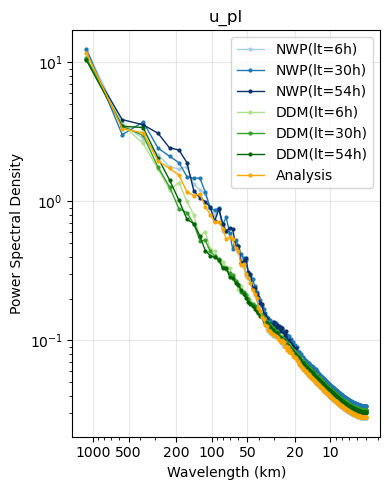

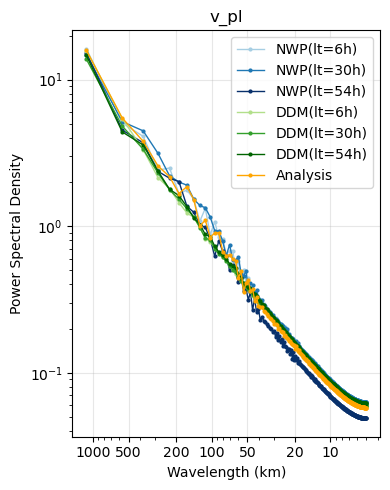

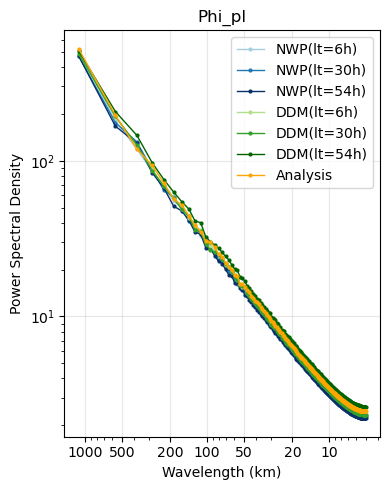

In [151]:
#u_pl
wl_u_pl_list_smoothed = [wl_u_pl_NWP_lt6_smoothed, wl_u_pl_NWP_lt30_smoothed, wl_u_pl_NWP_lt54_smoothed,
                   wl_u_pl_DDM_lt6_smoothed, wl_u_pl_DDM_lt30_smoothed, wl_u_pl_DDM_lt54_smoothed,
                   wl_u_pl_Analysis_smoothed]

pwd_u_pl_list_smoothed = [psd_u_pl_NWP_lt6_smoothed, psd_u_pl_NWP_lt30_smoothed, psd_u_pl_NWP_lt54_smoothed,
                   psd_u_pl_DDM_lt6_smoothed, psd_u_pl_DDM_lt30_smoothed, psd_u_pl_DDM_lt54_smoothed,
                   psd_u_pl_Analysis_smoothed]

labels = ['NWP(lt=6h)','NWP(lt=30h)','NWP(lt=54h)','DDM(lt=6h)','DDM(lt=30h)','DDM(lt=54h)','Analysis']

plot_1d_power_spectrum_comparison(wl_u_pl_list_smoothed, pwd_u_pl_list_smoothed, labels, title='u_pl')

#v_pl
wl_v_pl_list_smoothed = [wl_v_pl_NWP_lt6_smoothed, wl_v_pl_NWP_lt30_smoothed, wl_v_pl_NWP_lt54_smoothed,
                   wl_v_pl_DDM_lt6_smoothed, wl_v_pl_DDM_lt30_smoothed, wl_v_pl_DDM_lt54_smoothed,
                   wl_v_pl_Analysis_smoothed]

pwd_v_pl_list_smoothed = [psd_v_pl_NWP_lt6_smoothed, psd_v_pl_NWP_lt30_smoothed, psd_v_pl_NWP_lt54_smoothed,
                   psd_v_pl_DDM_lt6_smoothed, psd_v_pl_DDM_lt30_smoothed, psd_v_pl_DDM_lt54_smoothed,
                   psd_v_pl_Analysis_smoothed]

labels = ['NWP(lt=6h)','NWP(lt=30h)','NWP(lt=54h)','DDM(lt=6h)','DDM(lt=30h)','DDM(lt=54h)','Analysis']

plot_1d_power_spectrum_comparison(wl_v_pl_list_smoothed, pwd_v_pl_list_smoothed, labels, title='v_pl')

#Phi_pl
wl_Phi_pl_list_smoothed = [wl_Phi_pl_NWP_lt6_smoothed, wl_Phi_pl_NWP_lt30_smoothed, wl_Phi_pl_NWP_lt54_smoothed,
                    wl_Phi_pl_DDM_lt6_smoothed, wl_Phi_pl_DDM_lt30_smoothed, wl_Phi_pl_DDM_lt54_smoothed,
                    wl_Phi_pl_Analysis_smoothed]

pwd_Phi_pl_list_smoothed = [psd_Phi_pl_NWP_lt6_smoothed, psd_Phi_pl_NWP_lt30_smoothed, psd_Phi_pl_NWP_lt54_smoothed,
                     psd_Phi_pl_DDM_lt6_smoothed, psd_Phi_pl_DDM_lt30_smoothed, psd_Phi_pl_DDM_lt54_smoothed,
                     psd_Phi_pl_Analysis_smoothed]

labels = ['NWP(lt=6h)','NWP(lt=30h)','NWP(lt=54h)','DDM(lt=6h)','DDM(lt=30h)','DDM(lt=54h)','Analysis']

plot_1d_power_spectrum_comparison(wl_Phi_pl_list_smoothed, pwd_Phi_pl_list_smoothed, labels, title='Phi_pl')

In [152]:
#u_pl
wl_u_pl_list = [wl_u_pl_NWP_lt6, wl_u_pl_NWP_lt30, wl_u_pl_NWP_lt54,
                   wl_u_pl_DDM_lt6, wl_u_pl_DDM_lt30, wl_u_pl_DDM_lt54,
                   wl_u_pl_Analysis]

pwd_u_pl_list = [psd_u_pl_NWP_lt6, psd_u_pl_NWP_lt30, psd_u_pl_NWP_lt54,
                   psd_u_pl_DDM_lt6, psd_u_pl_DDM_lt30, psd_u_pl_DDM_lt54,
                   psd_u_pl_Analysis]

#v_pl
wl_v_pl_list = [wl_v_pl_NWP_lt6, wl_v_pl_NWP_lt30, wl_v_pl_NWP_lt54,
                   wl_v_pl_DDM_lt6, wl_v_pl_DDM_lt30, wl_v_pl_DDM_lt54,
                   wl_v_pl_Analysis]

pwd_v_pl_list = [psd_v_pl_NWP_lt6, psd_v_pl_NWP_lt30, psd_v_pl_NWP_lt54,
                   psd_v_pl_DDM_lt6, psd_v_pl_DDM_lt30, psd_v_pl_DDM_lt54,
                   psd_v_pl_Analysis]

#Phi_pl
wl_Phi_pl_list = [wl_Phi_pl_NWP_lt6, wl_Phi_pl_NWP_lt30, wl_Phi_pl_NWP_lt54,
                    wl_Phi_pl_DDM_lt6, wl_Phi_pl_DDM_lt30, wl_Phi_pl_DDM_lt54,
                    wl_Phi_pl_Analysis]

pwd_Phi_pl_list = [psd_Phi_pl_NWP_lt6, psd_Phi_pl_NWP_lt30, psd_Phi_pl_NWP_lt54,
                     psd_Phi_pl_DDM_lt6, psd_Phi_pl_DDM_lt30, psd_Phi_pl_DDM_lt54,
                     psd_Phi_pl_Analysis]

#u_pl
wl_u_pl_list_smoothed = [wl_u_pl_NWP_lt6_smoothed, wl_u_pl_NWP_lt30_smoothed, wl_u_pl_NWP_lt54_smoothed,
                   wl_u_pl_DDM_lt6_smoothed, wl_u_pl_DDM_lt30_smoothed, wl_u_pl_DDM_lt54_smoothed,
                   wl_u_pl_Analysis_smoothed]

pwd_u_pl_list_smoothed = [psd_u_pl_NWP_lt6_smoothed, psd_u_pl_NWP_lt30_smoothed, psd_u_pl_NWP_lt54_smoothed,
                   psd_u_pl_DDM_lt6_smoothed, psd_u_pl_DDM_lt30_smoothed, psd_u_pl_DDM_lt54_smoothed,
                   psd_u_pl_Analysis_smoothed]

#v_pl
wl_v_pl_list_smoothed = [wl_v_pl_NWP_lt6_smoothed, wl_v_pl_NWP_lt30_smoothed, wl_v_pl_NWP_lt54_smoothed,
                   wl_v_pl_DDM_lt6_smoothed, wl_v_pl_DDM_lt30_smoothed, wl_v_pl_DDM_lt54_smoothed,
                   wl_v_pl_Analysis_smoothed]

pwd_v_pl_list_smoothed = [psd_v_pl_NWP_lt6_smoothed, psd_v_pl_NWP_lt30_smoothed, psd_v_pl_NWP_lt54_smoothed,
                   psd_v_pl_DDM_lt6_smoothed, psd_v_pl_DDM_lt30_smoothed, psd_v_pl_DDM_lt54_smoothed,
                   psd_v_pl_Analysis_smoothed]

#Phi_pl
wl_Phi_pl_list_smoothed = [wl_Phi_pl_NWP_lt6_smoothed, wl_Phi_pl_NWP_lt30_smoothed, wl_Phi_pl_NWP_lt54_smoothed,
                    wl_Phi_pl_DDM_lt6_smoothed, wl_Phi_pl_DDM_lt30_smoothed, wl_Phi_pl_DDM_lt54_smoothed,
                    wl_Phi_pl_Analysis_smoothed]

pwd_Phi_pl_list_smoothed = [psd_Phi_pl_NWP_lt6_smoothed, psd_Phi_pl_NWP_lt30_smoothed, psd_Phi_pl_NWP_lt54_smoothed,
                     psd_Phi_pl_DDM_lt6_smoothed, psd_Phi_pl_DDM_lt30_smoothed, psd_Phi_pl_DDM_lt54_smoothed,
                     psd_Phi_pl_Analysis_smoothed]

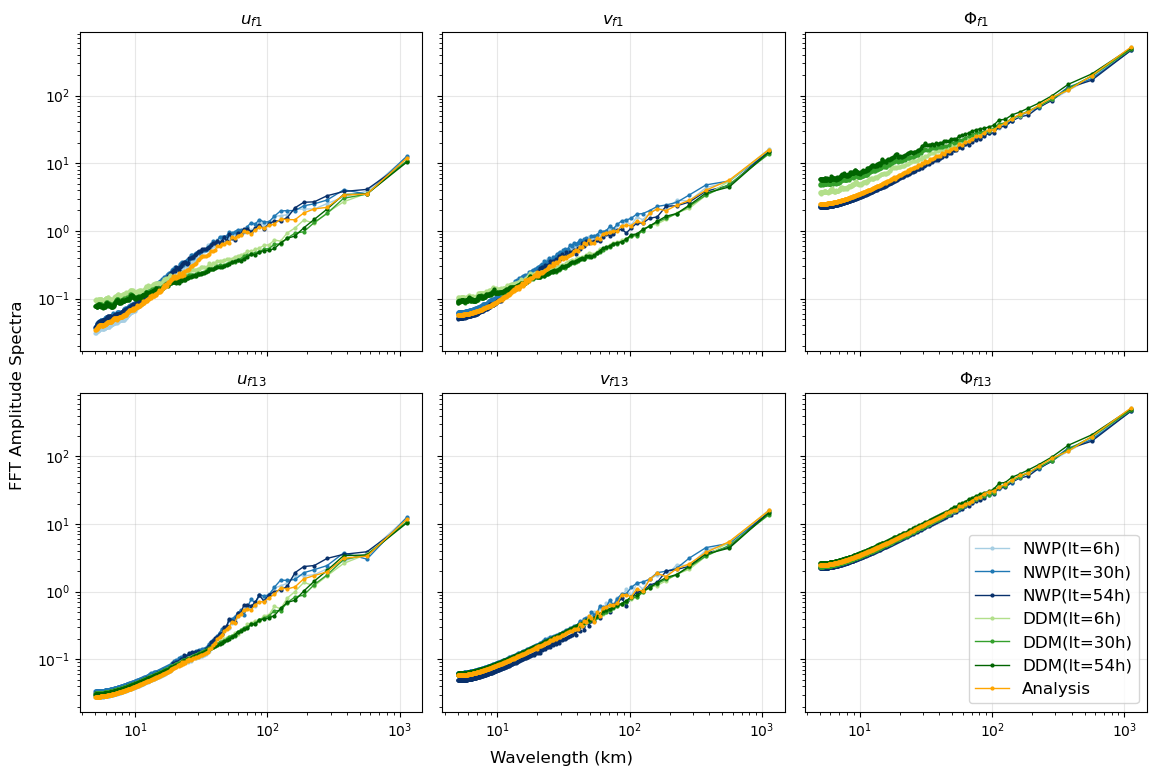

In [159]:
def plot_all_power_spectra(wl_lists, psd_lists, titles, labels, figsize=(12, 8), colors=None):

    fig, axes = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
    
    if colors is None:
        colors = [
            '#a6cee3', '#1f78b4', '#08306b', 
            '#b2df8a', '#33a02c', '#006400',   
            'orange',
        ]
    
    for i, ax in enumerate(axes.flat):
        wl_list = wl_lists[i]
        psd_list = psd_lists[i]
        title = titles[i]
        
        for j, (wavelength, psd) in enumerate(zip(wl_list, psd_list)):
            color = colors[j % len(colors)]
            ax.loglog(wavelength, psd, 'o-', linewidth=1, markersize=2, color=color, label=labels[j])
        
        ax.set_title(title, fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Add legend only for the last subplot (bottom-right)
        if i == len(axes.flat) - 1:
            ax.legend(fontsize=12, loc='lower right')
    
    # Set common labels
    fig.text(0.5, 0.04, 'Wavelength (km)', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'FFT Amplitude Spectra', va='center', rotation='vertical', fontsize=12)
    
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])
    plt.savefig("")
    plt.show()


# Prepare lists for first row (raw)
wl_lists_raw = [wl_u_pl_list, wl_v_pl_list, wl_Phi_pl_list,
                wl_u_pl_list_smoothed, wl_v_pl_list_smoothed, wl_Phi_pl_list_smoothed]

psd_lists_raw = [pwd_u_pl_list, pwd_v_pl_list, pwd_Phi_pl_list,
                 pwd_u_pl_list_smoothed, pwd_v_pl_list_smoothed, pwd_Phi_pl_list_smoothed]

titles = [r"$u_{f1}$", r"$v_{f1}$", r"$\Phi_{f1}$",
          r"$u_{f13}$", r"$v_{f13}$", r"$\Phi_{f13}$"]

labels = ['NWP(lt=6h)','NWP(lt=30h)','NWP(lt=54h)','DDM(lt=6h)','DDM(lt=30h)','DDM(lt=54h)','Analysis']

# Plot all
plot_all_power_spectra(wl_lists_raw, psd_lists_raw, titles, labels)